Fabian Gonzalez Vera | A01367585

# Módulo 5
##  __[Project Block 2: Advanced Statistics](https://rpubs.com/cdorante/tc3006c_p1)__


In [2]:
# industria asignada - Manufacturing industries

Previous course data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [4]:
dataf = pd.read_csv('dataus2023.csv') #Load dataset data
firmf = pd.read_csv('firmsus2023.csv')
print(dataf.shape, firmf.shape)

(533088, 22) (5615, 7)


Merge industry with data

In [5]:
dataf['qdate'] = pd.PeriodIndex(dataf.q, freq='Q')

In [6]:
firmf.columns

Index(['empresa', 'Nombre', 'status', 'partind', 'naics1', 'naics2',
       'SectorEconomatica'],
      dtype='object')

In [7]:
firms = firmf[['empresa','Nombre','status','naics1']] 
firms.columns=['firm','empresa','status', 'industria']

dataf = pd.merge(dataf, firms, on='firm', how='left') # Merge datasets
dataf.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate,empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.332411,104.0000,452000.000,2000,NaN,NaN,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,44.911205,73.7500,452271.967,2000,1453000.0,2000.0,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,29.801249,48.9375,453014.579,2000,1581000.0,2000.0,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,33.340861,54.7500,456366.381,2000,1741000.0,2000.0,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,18.713509,30.7300,456769.737,2001,1821000.0,2001.0,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [8]:
dataf.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'qdate', 'empresa', 'status', 'industria'],
      dtype='object')

In [9]:
dataf.set_index(['firm','qdate'],inplace=True)
dataf['ry'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(4))

In [10]:

dataf['rq'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(1))

In [11]:
# Calculate future quarterly return

dataf['f1rq'] = dataf.groupby(['firm'])['rq'].shift(-1)
dataf['f4rq'] = dataf.groupby(['firm'])['rq'].shift(-4)

dataf['f1ry'] = dataf.groupby(['firm'])['ry'].shift(-1)
dataf['f4ry'] = dataf.groupby(['firm'])['ry'].shift(-4)

In [12]:
dataf[['rq','f1rq','ry','f4rq','f1ry','f4ry']].head(10)

rq      f1rq        ry      f4rq      f1ry      f4ry
firm qdate                                                             
A    2000Q1       NaN -0.343710       NaN -0.577538       NaN -1.219152
     2000Q2 -0.343710 -0.410137       NaN  0.056001       NaN -0.819441
     2000Q3 -0.410137  0.112233       NaN -0.508265       NaN -0.917569
     2000Q4  0.112233 -0.577538       NaN  0.377280 -1.219152 -0.652522
     2001Q1 -0.577538  0.056001 -1.219152  0.203950 -0.819441  0.128965
     2001Q2  0.056001 -0.508265 -0.819441 -0.390841 -0.917569 -0.317877
     2001Q3 -0.508265  0.377280 -0.917569 -0.593809 -0.652522 -0.403421
     2001Q4  0.377280  0.203950 -0.652522  0.318593  0.128965 -0.462108
     2002Q1  0.203950 -0.390841  0.128965 -0.311725 -0.317877 -0.977783
     2002Q2 -0.390841 -0.593809 -0.317877  0.396554 -0.403421 -0.190388

In [13]:
dataf['ebit'] = dataf['revenue'] - dataf['cogs'] - dataf['sgae']
dataf['opm'] = np.where(dataf['revenue']==0, np.NaN, dataf['ebit']/dataf['revenue'])
dataf['netincome'] = dataf['ebit'] + dataf['otherincome'] + dataf['extraordinaryitems'] - dataf['finexp'] - dataf['incometax']
dataf['pm'] = np.where(dataf['revenue']==0, np.NaN, dataf['netincome']/dataf['revenue'])
dataf['ato'] = np.where(dataf['totalassets']==0, np.NaN, dataf['revenue']/dataf['totalassets'])
dataf['acidratio'] = np.where(dataf['currentliabilities']==0, np.NaN, dataf['currentassets']/dataf['currentliabilities'])
dataf['finlev'] = np.where(dataf['totalassets']==0, np.NaN, dataf['longdebt']/dataf['totalassets'])
dataf['mvalue'] = dataf['originalprice'] * dataf['sharesoutstanding']
dataf['bookvalue'] = dataf['totalassets'] - dataf['totalliabilities']

In [14]:
manufacturyInds = dataf.loc[(dataf['industria']=='Industrias manufactureras')]
MIy22 = manufacturyInds.loc[(manufacturyInds['year']==2022)]
MIy22.head()

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
A    2022Q1  2022q1          3.0  1674000.0   764000.0   534000.0   
     2022Q2  2022q2          6.0  3281000.0  1510000.0  1035000.0   
     2022Q3  2022q3          9.0  4999000.0  2289000.0  1563000.0   
     2022Q4  2022q4         12.0  6848000.0  3126000.0  2104000.0   
AA   2022Q1  2022q1          3.0  3293000.0  2181000.0   338000.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2022Q1     -37000.0                 0.0  20000.0    36000.0   10327000.0   
     2022Q2     -44000.0                 0.0  40000.0    95000.0   10455000.0   
     2022Q3     -41000.0                 0.0  57000.0   163000.0   10484000.0   
     2022Q4     -39000.0                 0.0  75000.0   250000.0   10532000.0   
AA   2022Q1      14000.0            -84000.0  25000.0   210000.0   15988000.0   

             ...      f4ry       ebit       opm  netincome        pm  \
firm qdate   ...                                                       
A    2022Q1  ...  0.050974   376000.0  0.224612   283000.0  0.169056   
     2022Q2  ...  0.020909   736000.0  0.224322   557000.0  0.169765   
     2022Q3  ... -0.010338  1147000.0  0.229446   886000.0  0.177235   
     2022Q4  ...       NaN  1618000.0  0.236273  1254000.0  0.183119   
AA   2022Q1  ... -0.741153   774000.0  0.235044   469000.0  0.142423   

                  ato  acidratio    finlev        mvalue  bookvalue  
firm qdate                                                           
A    2022Q1  0.162099   2.193182  0.264356  3.971400e+07  5154000.0  
     2022Q2  0.313821   2.009377  0.261119  3.547756e+07  5122000.0  
     2022Q3  0.476822   1.940063  0.260588  3.598373e+07  5091000.0  
     2022Q4  0.650209   2.030091  0.259495  4.430718e+07  5305000.0  
AA   2022Q1  0.205967   1.615118  0.108019  1.669183e+07  6257000.0  

[5 rows x 39 columns]

***
## 1.1 Descriptive Statistics

For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:

For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. 

Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

In [15]:
aux = MIy22

print('weighted average of opm       : ', '%.3f'%(aux['ebit'].sum()/aux['revenue'].sum()))
print('weighted average of pm        : ', '%.3f'%(aux['netincome'].sum()/aux['revenue'].sum()))
print('weighted average of ato       : ', '%.3f'%(aux['revenue'].sum()/aux['totalassets'].sum()))
print('weighted average of acidratio : ', '%.3f'%(aux['currentassets'].sum()/aux['currentliabilities'].sum()))
print('weighted average of finlev    : ', '%.3f'%(aux['longdebt'].sum()/aux['totalassets'].sum()))

weighted average of opm       :  0.143
weighted average of pm        :  0.107
weighted average of ato       :  0.465
weighted average of acidratio :  1.482
weighted average of finlev    :  0.263


In [16]:
aux = MIy22[['opm','pm','ato','acidratio','finlev']]
aux.describe()

,opm,pm,ato,acidratio,finlev
count,5272.000000,5272.000000,6285.000000,6273.000000,6285.000000
mean,-25.185582,-25.395869,0.379704,5.565042,0.221564
std,294.616670,306.027779,0.481799,8.246283,0.597456
min,-10287.583333,-10483.111111,-0.014311,0.001071,0.000000
25%,-0.768249,-0.799924,0.032699,1.747670,0.023978
50%,0.018442,0.004894,0.253958,2.869306,0.150741
75%,0.125726,0.092543,0.558648,6.167385,0.312131
max,1290.294118,1245.779412,13.562387,201.084988,28.659623


***
## 1.2 Multiple Regression - advanced topics

### 1.2.1 Calculation of Variables

In [17]:
# industria asignada - Manufacturing industries

manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
manufacturyInds['gsize'] = manufacturyInds['fsize']
manufacturyInds = pd.get_dummies(manufacturyInds,columns=['fsize'],drop_first=True, dtype=float)#,dummy_na=True)
manufacturyInds['oepsp'] = (manufacturyInds['ebit']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice']
manufacturyInds['epsp'] = (manufacturyInds['netincome']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice']
manufacturyInds['bmr'] = manufacturyInds['bookvalue']/manufacturyInds['mvalue']
MIy = manufacturyInds.loc[(manufacturyInds['status']=='activo') & (manufacturyInds['fiscalmonth']==12)]
MIy

C:\Users\fabig\AppData\Local\Temp\ipykernel_3396\2877535910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
C:\Users\fabig\AppData\Local\Temp\ipykernel_3396\2877535910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['gsize'] = manufacturyInds['fsize']


q  fiscalmonth     revenue       cogs         sgae  \
firm qdate                                                             
A    2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.000   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.000   
     2002Q4  2002q4         12.0   6010000.0  3694000.0  3923000.000   
     2003Q4  2003q4         12.0   6056000.0  3762000.0  3019000.000   
     2004Q4  2004q4         12.0   7181000.0  4058000.0  2737000.000   
...             ...          ...         ...        ...          ...   
ZYNE 2018Q4  2018q4         12.0        86.0        0.0    40483.830   
     2019Q4  2019q4         12.0         0.0        0.0    34319.810   
     2020Q4  2020q4         12.0         0.0        0.0    52062.542   
     2021Q4  2021q4         12.0         0.0        0.0    36770.390   
     2022Q4  2022q4         12.0         0.0        0.0    35251.540   

             otherincome  extraordinaryitems    finexp  incometax  \
firm qdate                                                          
A    2000Q4   111000.000        0.000000e+00     0.000   407000.0   
     2001Q4   301000.000        5.800000e+05     0.000   -71000.0   
     2002Q4    60000.000       -1.000000e+04     0.000  -525000.0   
     2003Q4    35000.000       -2.680000e+05     0.000  1100000.0   
     2004Q4    54000.000        0.000000e+00     0.000    91000.0   
...                  ...                 ...       ...        ...   
ZYNE 2018Q4     -474.668        0.000000e+00  -961.323        0.0   
     2019Q4     -145.911        0.000000e+00 -1522.138        0.0   
     2020Q4      481.719        0.000000e+00  -243.992        0.0   
     2021Q4     -559.681        0.000000e+00   -21.047        0.0   
     2022Q4     -631.126        7.275958e-12  -846.860        0.0   

             totalassets  ...  acidratio    finlev        mvalue    bookvalue  \
firm qdate                ...                                                   
A    2000Q4  8425000.000  ...   2.050399  0.000000  2.498606e+07  5265000.000   
     2001Q4  7986000.000  ...   2.397103  0.000000  1.321995e+07  5659000.000   
     2002Q4  8203000.000  ...   2.237506  0.140193  8.387759e+06  4627000.000   
     2003Q4  6297000.000  ...   2.040399  0.182627  1.392260e+07  2824000.000   
     2004Q4  7056000.000  ...   2.446285  0.162982  1.173287e+07  3569000.000   
...                  ...  ...        ...       ...           ...          ...   
ZYNE 2018Q4    67327.443  ...   6.884329  0.000000  5.235181e+04    57601.661   
     2019Q4    87764.596  ...   7.219675  0.001250  1.401160e+05    75596.743   
     2020Q4    74056.776  ...   5.273116  0.000000  9.714928e+04    60143.528   
     2021Q4    81171.507  ...   8.099352  0.004357  1.187065e+05    70913.334   
     2022Q4    55520.894  ...   5.971593  0.002153  2.494324e+04    46228.757   

             gsize  fsize_medium  fsize_big     oepsp      epsp       bmr  
firm qdate                                                                 
A    2000Q4    big           0.0        1.0  0.042144  0.030297  0.210718  
     2001Q4    big           0.0        1.0 -0.058850  0.013162  0.428065  
     2002Q4    big           0.0        1.0 -0.191589 -0.123036  0.551637  
     2003Q4    big           0.0        1.0 -0.052074 -0.147817  0.202836  
     2004Q4    big           0.0        1.0  0.032899  0.029745  0.304188  
...            ...           ...        ...       ...       ...       ...  
ZYNE 2018Q4  small           0.0        0.0 -0.771661 -0.762365  1.100280  
     2019Q4  small           0.0        0.0 -0.244939 -0.235117  0.539530  
     2020Q4  small           0.0        0.0 -0.535903 -0.528432  0.619084  
     2021Q4  small           0.0        0.0 -0.309759 -0.314296  0.597384  
     2022Q4  small           0.0        0.0 -1.413270 -1.404621  1.853358  

[16485 rows x 45 columns]

In [18]:
import statsmodels.api as sm
# Add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
regm = MIy.copy()
regm = regm.dropna()
x = regm[['opm','pm','ato','revenue','totalassets','mvalue','fsize_medium','fsize_big']]
X = sm.add_constant(x)

y = regm[['f1ry']]

mkmodel = sm.OLS(y,X,missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     64.32
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          7.86e-104
Time:                        11:33:00   Log-Likelihood:                -10894.
No. Observations:               12576   AIC:                         2.181e+04
Df Residuals:                   12567   BIC:                         2.187e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1601      0.010    -16.290   

***
## 1.2.2 Winsorization of variables

You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.

In [35]:
manufacturyInds[['pm','ato','oepsp','bmr']].describe()

,pm,ato,oepsp,bmr
count,85470.000000,93014.000000,88342.000000,8.848100e+04
mean,-18.317029,7.013129,7.747287,1.849935e+02
std,355.115903,1979.948288,2502.772261,4.418111e+04
min,-41501.684211,-0.145279,-179381.995545,-1.383779e+06
25%,-0.119142,0.152637,-0.045152,1.882313e-01
50%,0.034176,0.374852,0.015999,3.526559e-01
75%,0.089625,0.699228,0.050240,6.075151e-01
max,1533.205128,603848.692765,673116.999107,1.224872e+07


In [36]:
manufacturyInds.replace([np.inf, -np.inf], np.nan, inplace=True)
manufacturyInds[['pm','ato','oepsp','bmr']].describe()

,pm,ato,oepsp,bmr
count,85470.000000,93014.000000,88342.000000,8.848100e+04
mean,-18.317029,7.013129,7.747287,1.849935e+02
std,355.115903,1979.948288,2502.772261,4.418111e+04
min,-41501.684211,-0.145279,-179381.995545,-1.383779e+06
25%,-0.119142,0.152637,-0.045152,1.882313e-01
50%,0.034176,0.374852,0.015999,3.526559e-01
75%,0.089625,0.699228,0.050240,6.075151e-01
max,1533.205128,603848.692765,673116.999107,1.224872e+07


C:\Users\fabig\AppData\Local\Temp\ipykernel_3396\1120495282.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


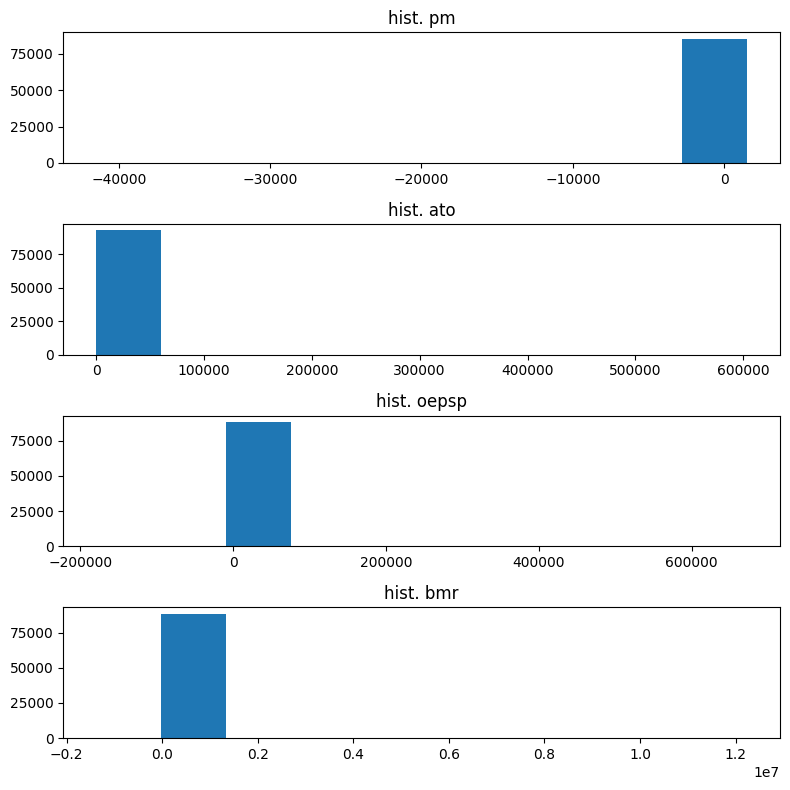

In [37]:
sv = ['pm','ato','oepsp','bmr']
f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c, i in enumerate(axes):
    vals = pd.DataFrame(manufacturyInds[[sv[lc]]])
    axes[c].hist(vals)
    axes[c].set_title('hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()

C:\Users\fabig\AppData\Local\Temp\ipykernel_3396\1793934448.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


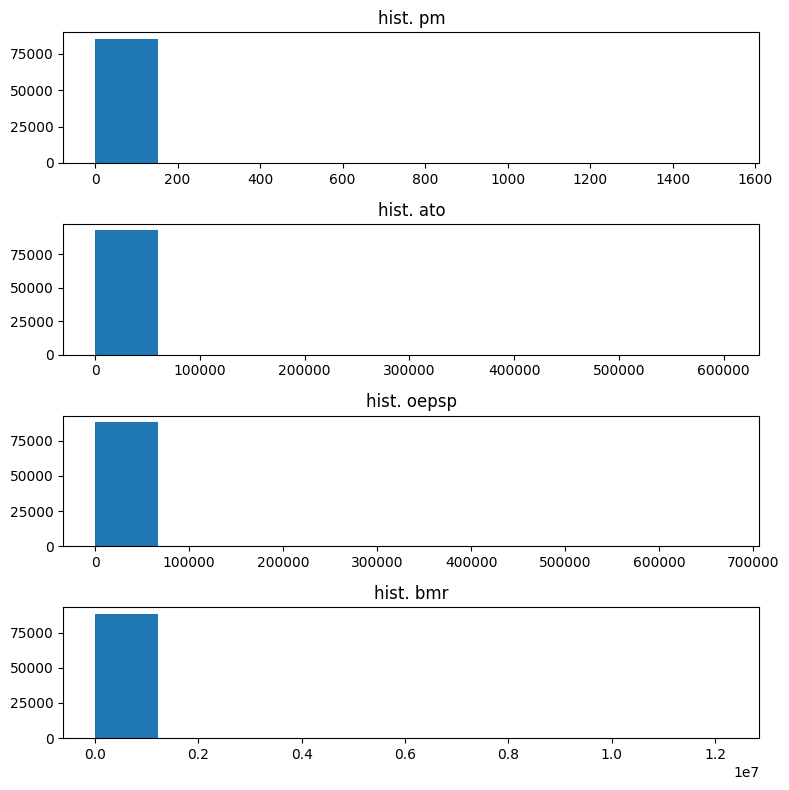

In [41]:
sv = ['pm','ato','oepsp','bmr']
f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c, i in enumerate(axes):
    vals = pd.DataFrame(manufacturyInds[[sv[lc]]])
    vals = winsorize(vals[sv[lc]], limits=[0.3, 0.3])
    axes[c].hist(vals)
    axes[c].set_title('hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()